# Detailed Data Cleaning/Visualization

*A blog post about the final end-to-end solution (21st place) is available [here](http://alanpryorjr.com), and the source code is [on my github](https://github.com/apryor6/Kaggle-Competition-Santander)*

*This is a Python version of a kernel I wrote in R for this dataset found [here](https://www.kaggle.com/apryor6/santander-product-recommendation/detailed-cleaning-visualization). There are some slight differences between how missing values are treated in Python and R, so the two kernels are not exactly the same, but I have tried to make them as similar as possible. This was done as a convenience to anybody who wanted to use my cleaned data as a starting point but prefers Python to R. It also is educational to compare how the same task can be accomplished in either language.*

The goal of this competition is to predict which new Santander products, if any, a customer will purchase in the following month. Here, I will do some data cleaning, adjust some features, and do some visualization to get a sense of what features might be important predictors. I won't be building a predictive model in this kernel, but I hope this gives you some insight/ideas and gets you excited to build your own model.

Let's get to it

## First Glance
Limit the number of rows read in to avoid memory crashes with the kernel

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [3]:
limit_rows   = 15000000
df           = pd.read_csv("train_filtered.csv",dtype={"sexo":str,
                                                    "ind_nuevo":str,
                                                    "ult_fec_cli_1t":str,
                                                    "indext":str}, nrows=limit_rows)
unique_ids   = pd.Series(df["ncodpers"].unique())
# limit_people = 10000000
# unique_id    = unique_ids.sample(n=limit_people)
# df           = df[df.ncodpers.isin(unique_id)]
df.describe()

D:\Anaconda\envs\santander\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ncodpers,age,antiguedad,indrel,tipodom,cod_prov,ind_actividad_cliente,renta,ind_ahor_fin_ult1,ind_aval_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
count,1.859727e+06,1.859727e+06,1.859727e+06,1.859727e+06,1859727.0,1.851745e+06,1.859727e+06,1.405454e+06,1.859727e+06,1.859727e+06,...,1.859727e+06,1.859727e+06,1.859727e+06,1.859727e+06,1.859727e+06,1.859727e+06,1.859727e+06,1.859727e+06,1.859727e+06,1.859727e+06
mean,8.787559e+05,4.012575e+01,7.630108e+01,1.182222e+00,1.0,2.654611e+01,4.249021e-01,1.340906e+05,8.334557e-05,1.720683e-05,...,4.878135e-03,7.917291e-03,2.139024e-03,4.882975e-02,3.744044e-02,2.302005e-02,3.183801e-03,5.079133e-02,5.566408e-02,1.208769e-01
std,4.477939e+05,1.719302e+01,1.797581e+03,4.221919e+00,0.0,1.283624e+01,4.943283e-01,2.321840e+05,9.129001e-03,4.148077e-03,...,6.967311e-02,8.862625e-02,4.620010e-02,2.155120e-01,1.898385e-01,1.499671e-01,5.633530e-02,2.195714e-01,2.292719e-01,3.259842e-01
min,1.588900e+04,2.000000e+00,-9.999990e+05,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.829905e+05,2.500000e+01,2.200000e+01,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.849459e+04,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,9.658240e+05,3.800000e+01,5.300000e+01,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.014958e+05,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.263239e+06,5.000000e+01,1.340000e+02,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.555430e+05,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.553689e+06,1.640000e+02,2.560000e+02,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


We have a number of demographics for each individual as well as the products they currently own. To make a test set, I will separate the last month from this training data, and create a feature that indicates whether or not a product was newly purchased. First convert the dates. There's `fecha_dato`, the row-identifier date, and `fecha_alta`, the date that the customer joined.

In [4]:
df["fecha_dato"] = pd.to_datetime(df["fecha_dato"],format="%Y-%m-%d")
df["fecha_alta"] = pd.to_datetime(df["fecha_alta"],format="%Y-%m-%d")
df["fecha_dato"].unique()

array(['2016-04-28T00:00:00.000000000', '2016-05-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

I printed the values just to double check the dates were in standard Year-Month-Day format. I expect that customers will be more likely to buy products at certain months of the year (Christmas bonuses?), so let's add a month column. I don't think the month that they joined matters, so just do it for one.

In [5]:
df["month"] = pd.DatetimeIndex(df["fecha_dato"]).month
df["age"]   = pd.to_numeric(df["age"], errors="coerce")

Are there any columns missing values?

In [6]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                  True
nomprov                   True
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp

Definitely. Onto data cleaning.

## Data Cleaning

Going down the list, start with `age`

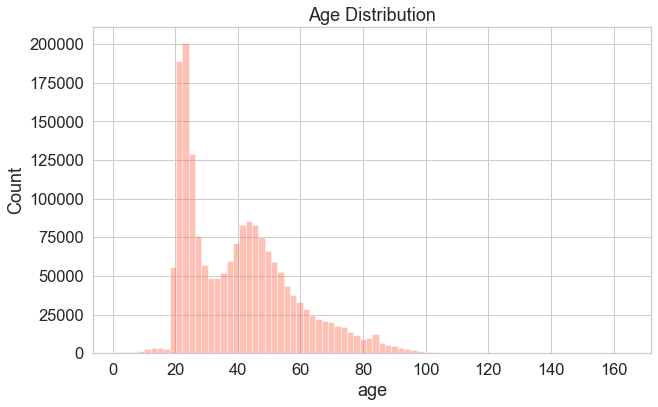

In [7]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")

In addition to NA, there are people with very small and very high ages.
It's also interesting that the distribution is bimodal. There are a large number of university aged students, and then another peak around middle-age. Let's separate the distribution and move the outliers to the mean of the closest one.

In [8]:
df.loc[df.age < 18,"age"]  = df.loc[(df.age >= 18) & (df.age <= 30),"age"].mean(skipna=True)
df.loc[df.age > 100,"age"] = df.loc[(df.age >= 30) & (df.age <= 100),"age"].mean(skipna=True)
df["age"].fillna(df["age"].mean(),inplace=True)
df["age"]                  = df["age"].astype(int)

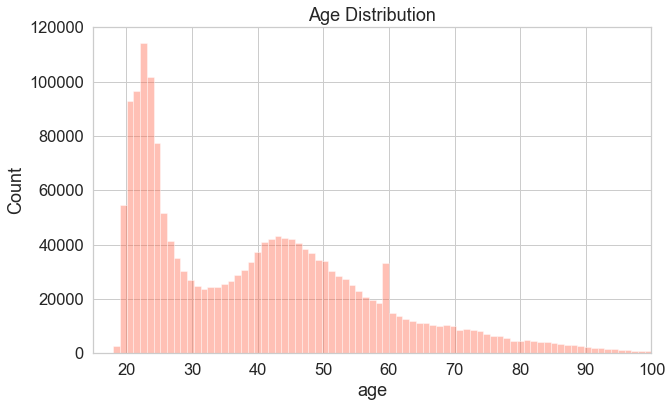

In [9]:
with sns.plotting_context("notebook",font_scale=1.5):
    sns.set_style("whitegrid")
    sns.distplot(df["age"].dropna(),
                 bins=80,
                 kde=False,
                 color="tomato")
    plt.title("Age Distribution")
    plt.ylabel("Count")
    plt.xlim((15,100))

Looks better.  

Next `ind_nuevo`, which indicates whether a customer is new or not. How many missing values are there?

In [10]:
df["ind_nuevo"].isnull().sum()

0

Let's see if we can fill in missing values by looking how many months of history these customers have.

In [11]:
months_active = df.loc[df["ind_nuevo"].isnull(),:].groupby("ncodpers", sort=False).size()
months_active.max()

nan

Looks like these are all new customers, so replace accordingly.

In [12]:
df.loc[df["ind_nuevo"].isnull(),"ind_nuevo"] = 1

Now, `antiguedad`

In [13]:
df.antiguedad = pd.to_numeric(df.antiguedad,errors="coerce")
np.sum(df["antiguedad"].isnull())

0

That number again. Probably the same people that we just determined were new customers. Double check.

In [14]:
df.loc[df["antiguedad"].isnull(),"ind_nuevo"].describe()

count       0
unique      0
top       NaN
freq      NaN
Name: ind_nuevo, dtype: object

Yup, same people. Let's give them minimum seniority.

In [15]:
df.loc[df.antiguedad.isnull(),"antiguedad"] = df.antiguedad.min()
df.loc[df.antiguedad <0, "antiguedad"]      = 0 # Thanks @StephenSmith for bug-find

Some entries don't have the date they joined the company. Just give them something in the middle of the pack

In [16]:
dates=df.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
df.loc[df.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]
df["fecha_alta"].describe()

count                 1859727
unique                   6750
top       2014-07-28 00:00:00
freq                     6846
first     1995-01-16 00:00:00
last      2016-05-31 00:00:00
Name: fecha_alta, dtype: object

Next is `indrel`, which indicates:

> 1 (First/Primary), 99 (Primary customer during the month but not at the end of the month)

This sounds like a promising feature. I'm not sure if primary status is something the customer chooses or the company assigns, but either way it seems intuitive that customers who are dropping down are likely to have different purchasing behaviors than others.

In [17]:
pd.Series([i for i in df.indrel]).value_counts()

1     1856269
99       3458
dtype: int64

Fill in missing with the more common status.

In [18]:
df.loc[df.indrel.isnull(),"indrel"] = 1

> tipodom	- Addres type. 1, primary address
 cod_prov	- Province code (customer's address)

`tipodom` doesn't seem to be useful, and the province code is not needed because the name of the province exists in `nomprov`.

In [19]:
df.drop(["tipodom","cod_prov"],axis=1,inplace=True)

Quick check back to see how we are doing on missing values

In [20]:
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
nomprov                   True
ind_actividad_cliente    False
renta                     True
segmento                  True
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

Getting closer.

In [21]:
np.sum(df["ind_actividad_cliente"].isnull())

0

By now you've probably noticed that this number keeps popping up. A handful of the entries are just bad, and should probably just be excluded from the model. But for now I will just clean/keep them.

In [22]:
df.loc[df.ind_actividad_cliente.isnull(),"ind_actividad_cliente"] = \
df["ind_actividad_cliente"].median()

In [23]:
df.nomprov.unique()

array(['CANTABRIA', 'BIZKAIA', 'TOLEDO', 'ZARAGOZA', 'MADRID', 'VALENCIA',
       'BARCELONA', 'GIPUZKOA', 'LEON', 'MALAGA', 'BALEARS, ILLES',
       'SANTA CRUZ DE TENERIFE', 'ALICANTE', 'SEVILLA', 'CADIZ',
       'CIUDAD REAL', 'OURENSE', 'SALAMANCA', 'CUENCA', 'PALMAS, LAS',
       'RIOJA, LA', 'LUGO', 'CACERES', 'ALBACETE', 'PONTEVEDRA',
       'ASTURIAS', 'PALENCIA', 'TERUEL', 'GRANADA', 'CORUÑA, A',
       'CASTELLON', 'CORDOBA', 'MURCIA', 'GUADALAJARA', 'ZAMORA', 'ALAVA',
       'ALMERIA', 'HUELVA', 'LERIDA', 'SEGOVIA', 'NAVARRA', 'TARRAGONA',
       'BADAJOZ', 'GIRONA', 'JAEN', nan, 'VALLADOLID', 'BURGOS',
       'MELILLA', 'AVILA', 'HUESCA', 'SORIA', 'CEUTA'], dtype=object)

There was an issue with the unicode character ñ in [A Coruña](https://en.wikipedia.org/wiki/A_Coruña). I'll manually fix it, but if anybody knows a better way to catch cases like this I would be very glad to hear it in the comments.

In [24]:
df.loc[df.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

There's some rows missing a city that I'll relabel

In [25]:
df.loc[df.nomprov.isnull(),"nomprov"] = "UNKNOWN"

Now for gross income, aka `renta`

In [26]:
df.renta.isnull().sum()

454273

Here is a feature that is missing a lot of values. Rather than just filling them in with a median, it's probably more accurate to break it down region by region. To that end, let's take a look at the median income by region, and in the spirit of the competition let's color it like the Spanish flag.

In [27]:
df.loc[df.renta.isnull(),:].groupby("nomprov").renta = df.loc[df.renta.notnull(),:].groupby("nomprov").mean().renta
df["MedianIncome"] = df.loc[df.renta.notnull(),:].groupby("nomprov").renta.transform("mean")
incomes = df.copy()

In [28]:
from pandas.api.types import CategoricalDtype

#df.loc[df.renta.notnull(),:].groupby("nomprov").agg([{"Sum":sum},{"Mean":mean}])
# incomes = df.loc[df.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
incomes.sort_values(["MedianIncome"],inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", CategoricalDtype([i for i in df.nomprov.unique()], ordered=True))
incomes.head()
incomes = incomes[["MedianIncome","nomprov"]]
df["MedianIncome"] = df.loc[df.renta.notnull(),:].groupby("nomprov").renta.transform("mean")
# medianIncome = df.groupby("nomprov")[["MedianIncome"]].reset_index()
# incomes = df.loc[df.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
# incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
# incomes.reset_index(inplace=True)
# incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in df.nomprov.unique()],ordered=False)
# incomes.head()

In [29]:
incomes.head()

,MedianIncome,nomprov
0,69750.701323,CUENCA
1,69750.701323,CUENCA
2,69750.701323,CUENCA
3,69750.701323,CUENCA
4,69750.701323,CUENCA


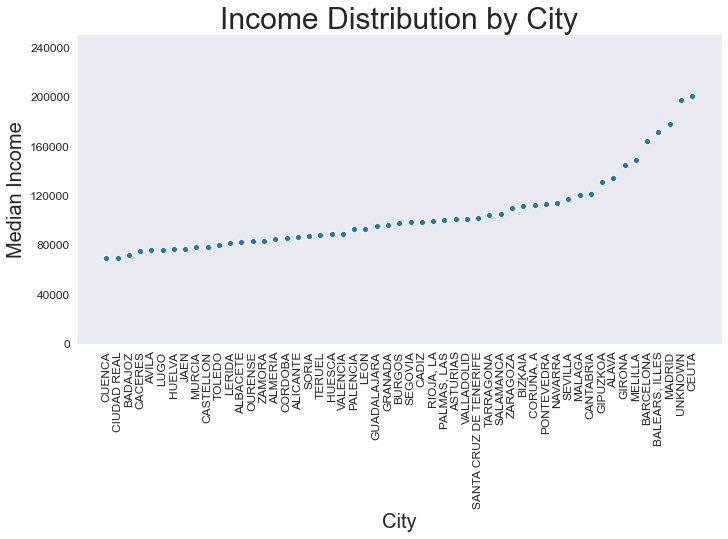

In [30]:
# with sns.axes_style({
#         "axes.facecolor":   "#ffc400",
#         "axes.grid"     :    False,
#         "figure.facecolor": "#c60b1e"}):
#     h = sns.factorplot(data=incomes,
#                    x="nomprov",
#                    y="renta",
#                       hue="MedianIncome",
# #                    order=(i for i in incomes.nomprov),
#                    size=6,
#                    aspect=1.5,
#                    scale=1.0,
#                    color="#c60b1e",
#                    linestyles="None")
# plt.xticks(rotation=90)
# plt.tick_params(labelsize=16,labelcolor="#ffc400")#
# plt.ylabel("Median Income",size=32,color="#ffc400")
# plt.xlabel("City",size=32,color="#ffc400")
# plt.title("Income Distribution by City",size=40,color="#ffc400")
# plt.ylim(0,180000)
# plt.yticks(range(0,180000,40000))
sns.set_style("darkgrid")
sns.relplot(data=incomes,x='nomprov',y='MedianIncome', aspect=2)
plt.xticks(rotation=90)
plt.tick_params(labelsize=12)#
plt.ylabel("Median Income",size=20)
plt.xlabel("City",size=20)
plt.title("Income Distribution by City",size=30)
plt.ylim(0,250000)
plt.yticks(range(0,250000,40000))
plt.grid(False)

There's a lot of variation, so I think assigning missing incomes by providence is a good idea. First group the data by city, and reduce to get the median. This intermediate data frame is joined by the original city names to expand the aggregated median incomes, ordered so that there is a 1-to-1 mapping between the rows, and finally the missing values are replaced.

In [85]:
grouped        = df.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes    = pd.merge(df,grouped,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes    = new_incomes.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df.sort_values("nomprov",inplace=True)
df             = df.reset_index()
new_incomes    = new_incomes.reset_index()

In [86]:
df.loc[df.renta.isnull(),"renta"] = new_incomes.loc[df.renta.isnull(),"renta"].reset_index()
df.loc[df.renta.isnull(),"renta"] = df.loc[df.renta.notnull(),"renta"].median()
df.sort_values(by="fecha_dato",inplace=True)

The next columns with missing data I'll look at are features, which are just a boolean indicator as to whether or not that product was owned that month. Starting with `ind_nomina_ult1`..

In [31]:
df.ind_nomina_ult1.isnull().sum()

0

I could try to fill in missing values for products by looking at previous months, but since it's such a small number of values for now I'll take the cheap way out.

In [32]:
df.loc[df.ind_nomina_ult1.isnull(), "ind_nomina_ult1"] = 0
df.loc[df.ind_nom_pens_ult1.isnull(), "ind_nom_pens_ult1"] = 0

There's also a bunch of character columns that contain empty strings. In R, these are kept as empty strings instead of NA like in pandas. I originally worked through the data with missing values first in R, so if you are wondering why I skipped some NA columns here that's why. I'll take care of them now. For the most part, entries with NA will be converted to an unknown category.  
First I'll get only the columns with missing values. Then print the unique values to determine what I should fill in with.

In [33]:
string_data = df.select_dtypes(include=["object"])
missing_columns = [col for col in string_data if string_data[col].isnull().any()]
for col in missing_columns:
    print("Unique values for {0}:\n{1}\n".format(col,string_data[col].unique()))
del string_data

Unique values for sexo:
['H' 'V' nan]

Unique values for ult_fec_cli_1t:
[nan '2016-04-22' '2016-04-01' '2016-04-06' '2016-04-12' '2016-04-05'
 '2016-04-15' '2016-04-13' '2016-04-19' '2016-04-04' '2016-04-18'
 '2016-04-26' '2016-04-11' '2016-04-25' '2016-04-27' '2016-04-08'
 '2016-04-07' '2016-04-21' '2016-04-28' '2016-04-20' '2016-04-14'
 '2016-05-23' '2016-05-05' '2016-05-17' '2016-05-19' '2016-05-12'
 '2016-05-06' '2016-05-03' '2016-05-20' '2016-05-02' '2016-05-16'
 '2016-05-18' '2016-05-04' '2016-05-13' '2016-05-24' '2016-05-27'
 '2016-05-10' '2016-05-30' '2016-05-25' '2016-05-11' '2016-05-09'
 '2016-05-26']

Unique values for indrel_1mes:
[1.0 nan 3.0 4.0 2.0 '1.0' '4.0' '1' 'P' '3.0' '3' '2.0' '4' '2']

Unique values for tiprel_1mes:
['I' 'A' nan 'P' 'R']

Unique values for conyuemp:
[nan 'N' 'S']

Unique values for canal_entrada:
['KFF' 'KAT' 'KAZ' 'KFC' 'KAA' 'KHL' 'KHK' 'KFK' 'KFD' 'KFA' 'KAR' 'KFS'
 'KHC' 'KFG' 'KAE' 'KAI' 'KHM' 'KFJ' 'KAG' 'KHN' 'KHE' 'KGX' 'KFU' 'KFL'
 'KAB

Okay, based on that and the definitions of each variable, I will fill the empty strings either with the most common value or create an unknown category based on what I think makes more sense.

In [34]:
df.loc[df.indfall.isnull(),"indfall"] = "N"
df.loc[df.tiprel_1mes.isnull(),"tiprel_1mes"] = "A"
df.tiprel_1mes = df.tiprel_1mes.astype("category")

# As suggested by @StephenSmith
map_dict = { 1.0  : "1",
            "1.0" : "1",
            "1"   : "1",
            "3.0" : "3",
            "P"   : "P",
            3.0   : "3",
            2.0   : "2",
            "3"   : "3",
            "2.0" : "2",
            "4.0" : "4",
            "4"   : "4",
            "2"   : "2"}

df.indrel_1mes.fillna("P",inplace=True)
df.indrel_1mes = df.indrel_1mes.apply(lambda x: map_dict.get(x,x))
df.indrel_1mes = df.indrel_1mes.astype("category")


unknown_cols = [col for col in missing_columns if col not in ["indfall","tiprel_1mes","indrel_1mes"]]
for col in unknown_cols:
    df.loc[df[col].isnull(),col] = "UNKNOWN"

Let's check back to see if we missed anything

In [35]:
df["MedianIncome"] = df.loc[df.renta.notnull(),:].groupby("nomprov").renta.transform("mean")
df.isnull().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                     False
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t           False
indrel_1mes              False
tiprel_1mes              False
indresi                  False
indext                   False
conyuemp                 False
canal_entrada            False
indfall                  False
nomprov                  False
ind_actividad_cliente    False
renta                     True
segmento                 False
ind_ahor_fin_ult1        False
ind_aval_fin_ult1        False
ind_cco_fin_ult1         False
ind_cder_fin_ult1        False
ind_cno_fin_ult1         False
ind_ctju_fin_ult1        False
ind_ctma_fin_ult1        False
ind_ctop_fin_ult1        False
ind_ctpp_fin_ult1        False
ind_deco_fin_ult1        False
ind_deme

In [36]:
df.dtypes

fecha_dato               datetime64[ns]
ncodpers                          int64
ind_empleado                     object
pais_residencia                  object
sexo                             object
age                               int32
fecha_alta               datetime64[ns]
ind_nuevo                        object
antiguedad                        int64
indrel                            int64
ult_fec_cli_1t                   object
indrel_1mes                    category
tiprel_1mes                    category
indresi                          object
indext                           object
conyuemp                         object
canal_entrada                    object
indfall                          object
nomprov                          object
ind_actividad_cliente           float64
renta                           float64
segmento                         object
ind_ahor_fin_ult1                 int64
ind_aval_fin_ult1                 int64
ind_cco_fin_ult1                  int64


In [38]:
df.to_csv('train_ver2_complete.csv', index=False)

### SVD Method

In [37]:
from scipy.linalg import sqrtm
def compute_svd(k,train_df):
    U,s,V = np.linalg.svd(train_df,full_matrices=False)

    s=np.diag(s)
    
    # Select k latent vector
    s=s[0:k,0:k]
    U=U[:,0:k]
    V=V[0:k,:]

    s_root=sqrtm(s)

    Usk=np.dot(U,s_root)
    skV=np.dot(s_root,V)
    UsV = np.dot(Usk, skV)
    return UsV

In [38]:
df_test = pd.read_csv("test_ver2.csv",dtype={"sexo":str,"ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str})

D:\Anaconda\envs\santander\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [39]:
ncodpers_test = df_test.ncodpers.unique()
print(ncodpers_test)
# Create matrix for month 05-2016
batch_1 = df[(df["fecha_dato"]=="2016-05-28") & (df["ncodpers"].isin(ncodpers_test))].copy()
print(len(batch_1))
ncodpers_batch_1 = batch_1.ncodpers.unique()
# Create matrix for month 04-2016
batch_2 = df[(df["fecha_dato"]=="2016-04-28") & (df["ncodpers"].isin(ncodpers_batch_1))].copy()
ncodpers_batch_2 = batch_2.ncodpers.unique()
# Remove users unpresent in month 04-2016
# batch_1 = batch_1[batch_1["ncodpers"].isin(ncodpers_batch_2)]

[  15889 1170544 1170545 ...  660240  660243  660248]
929615


In [42]:
batch_2.tail()# len(df_test)

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,MedianIncome
1596742,110658,2016-04-28,574631,N,ES,H,43,2005-10-27,0,126,...,0,0,0,0,0,0,0,0,4,113738.117995
1673544,42686,2016-04-28,725997,N,FR,V,51,2007-10-16,0,102,...,0,0,0,0,0,0,0,0,4,99703.069946
1596665,110488,2016-04-28,573146,N,ES,V,74,2005-10-25,0,126,...,0,0,0,0,0,0,0,0,4,113738.117995
1611856,248151,2016-04-28,136173,N,ES,V,50,1999-06-24,0,202,...,0,0,0,0,0,0,0,0,4,113738.117995
509016,666129,2016-04-28,1039102,N,ES,H,48,2012-08-01,0,44,...,0,0,0,0,0,0,0,0,4,108449.110082


In [43]:
batch_1.tail()

,index,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,...,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,month,MedianIncome
762842,1492272,2016-05-28,1329311,N,ES,H,22,2014-10-09,0,19,...,0,0,0,0,0,0,0,0,5,166251.026441
762841,1492271,2016-05-28,1329312,N,ES,H,24,2014-10-09,0,19,...,0,0,0,0,0,0,0,0,5,166251.026441
762840,1492266,2016-05-28,1329287,N,ES,V,29,2014-10-09,0,19,...,0,0,0,0,0,0,0,0,5,166251.026441
762847,1492282,2016-05-28,1329300,N,ES,V,26,2014-10-09,0,19,...,0,0,0,0,0,0,0,0,5,166251.026441
929863,1323828,2016-05-28,443155,N,ES,V,27,2003-11-04,0,150,...,0,0,0,1,0,0,0,0,5,166251.026441


In [40]:
cols =['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1',
       'ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
       'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
#Sort values by client id so that the matrices are coherent (for summation and prediction)
batch_1_train = batch_1.sort_values('ncodpers')
batch_2_train = batch_2.sort_values('ncodpers')

ncodpers = batch_1_train.ncodpers

x_1 = batch_1_train[cols]
x_2 = batch_2_train[cols]

In [45]:
x_1.dtypes

ind_ahor_fin_ult1    int64
ind_aval_fin_ult1    int64
ind_cco_fin_ult1     int64
ind_cder_fin_ult1    int64
ind_cno_fin_ult1     int64
ind_ctju_fin_ult1    int64
ind_ctma_fin_ult1    int64
ind_ctop_fin_ult1    int64
ind_ctpp_fin_ult1    int64
ind_deco_fin_ult1    int64
ind_deme_fin_ult1    int64
ind_dela_fin_ult1    int64
ind_ecue_fin_ult1    int64
ind_fond_fin_ult1    int64
ind_hip_fin_ult1     int64
ind_plan_fin_ult1    int64
ind_pres_fin_ult1    int64
ind_reca_fin_ult1    int64
ind_tjcr_fin_ult1    int64
ind_valo_fin_ult1    int64
ind_viv_fin_ult1     int64
ind_nomina_ult1      int64
ind_nom_pens_ult1    int64
ind_recibo_ult1      int64
dtype: object

In [41]:
x_1 = x_1.values
x_2 = x_2.values

In [53]:
len(x_1)

929615

In [63]:
reconstruct = compute_svd(4,x_1)

In [102]:
reconstruct[0]

array([1.02255812e-04, 4.36753952e-05, 1.01561680e+00, 5.72912660e-04,
       1.12724750e-01, 2.25051724e-05, 9.52717295e-03, 1.24774984e-01,
       5.66775585e-02, 6.07922041e-04, 1.95474681e-03, 6.45425637e-02,
       1.83623236e-01, 3.08885207e-02, 9.00839481e-03, 1.39326329e-02,
       1.79778142e-03, 9.18359334e-02, 7.68683812e-02, 4.65422467e-02,
       4.45879759e-03, 8.67834675e-02, 9.45462613e-02, 2.46027122e-01])

In [64]:
import csv

from tqdm import tqdm


def predict(UsV,threshold,k, init_df):
    with open("test_4_results.csv",'w') as results_file:
        writer = csv.writer(results_file,delimiter=",")
        writer.writerow(['ncodpers','added_products'])
        for i, row in enumerate(tqdm(UsV)):
            idxs = np.argsort(row)[-k:]
            keys = [cols[k] for k in idxs]
            final_values = [init_df.iloc[i][['ncodpers']].values[0]]
            second_col = " "
            for idx, key in enumerate(keys.copy()):
                if row[idxs[idx]]>=threshold:
                    second_col += key + " "
            final_values.append(second_col)      
            writer.writerow(final_values)
                    
        
        

In [65]:
predict(reconstruct, 0.001, 7, batch_1_train)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 929615/929615 [14:29<00:00, 1069.49it/s]


### Dictionary Learning

In [70]:
from sklearn.decomposition import DictionaryLearning, MiniBatchDictionaryLearning 
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from time import time

def dictionary_learning(data):
    t0 = time()
    dico = MiniBatchDictionaryLearning(n_components=4,alpha=0.7, n_iter=1000,transform_algorithm='lasso_lars')
#     dico = DictionaryLearning(n_components=20, alpha=0.7,transform_algorithm='lasso_lars')
    dico = dico.fit(data)
    dt = time() - t0
    print("done in {}".format(dt))
    return dico

In [71]:
dico = dictionary_learning(x_1)

done in 6.268072128295898


In [72]:
U = dico.transform(x_1)

In [53]:
#User vector
U.shape

(925252, 20)

In [54]:
# Products Vector : extracted components
V = dico.components_
V.shape

(20, 24)

In [121]:
# Reconstructed matrix using a dictionary
reconstruct_with_dico = U.dot(V)

In [124]:
reconstruct_with_dico[0]

array([ 0.00000000e+00,  0.00000000e+00,  3.19878028e-01,  0.00000000e+00,
        1.38793533e-02,  0.00000000e+00,  5.28442004e-06,  4.51115419e-02,
        3.16319811e-01,  1.83911022e-05,  1.68624972e-05,  2.73821884e-02,
        1.20464411e-02,  1.37177068e-02,  8.17099004e-03,  2.66615340e-02,
       -1.65659984e-05,  1.00812061e-02,  7.98834495e-03,  7.87095254e-03,
       -3.61848525e-04, -8.19360882e-04, -1.24922343e-03,  1.25203367e-01])

### Alternating Least Square for Implicit Dataset 

In [1]:
import argparse
import pandas as pd
from tqdm import tqdm
import implicit
from scipy.sparse import coo_matrix

In [3]:
data = pd.read_csv('train_ALS.csv',header=None)

,0,1,2
0,657640,0,0
1,657640,1,0
2,657640,2,0
3,657640,3,0
4,657640,4,0


In [40]:
df_test = pd.read_csv("test_ver2.csv",dtype={"sexo":str,"ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str})

D:\Anaconda\envs\santander\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
products_user = coo_matrix((data[2],(data[1],data[0])))
user_products = products_user.T.tocsr()

In [42]:
model = implicit.als.AlternatingLeastSquares(factors=4, regularization=0.01, iterations=10)

In [36]:
alpha_val = 1
data_conf =  (products_user*alpha_val).astype('double')

In [43]:
model.fit(data_conf)

In [57]:
results = model.recommend(657650, user_products,filter_already_liked_items=False, N=7)

In [52]:
products_user.col

array([ 657640,  657640,  657640, ..., 1550586, 1550586, 1550586],
      dtype=int32)

In [58]:
results

[(4, nan), (1, nan), (10, nan), (7, nan), (8, nan), (9, nan), (23, nan)]

### Supervised

In [38]:
df_test = pd.read_csv("test_ver2.csv",dtype={"sexo":str,"ind_nuevo":str,"ult_fec_cli_1t":str,"indext":str})

D:\Anaconda\envs\santander\lib\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
ncodpers_test = df_test.ncodpers.unique()
print(ncodpers_test)
# Create matrix for month 05-2016
batch_1 = df[(df["fecha_dato"]=="2016-05-28") & (df["ncodpers"].isin(ncodpers_test))].copy()
print(len(batch_1))
ncodpers_batch_1 = batch_1.ncodpers.unique()
# Create matrix for month 04-2016
batch_2 = df[(df["fecha_dato"]=="2016-04-28") & (df["ncodpers"].isin(ncodpers_batch_1))].copy()
ncodpers_batch_2 = batch_2.ncodpers.unique()
# Remove users unpresent in month 04-2016
batch_1 = batch_1[batch_1["ncodpers"].isin(ncodpers_batch_2)]

cols =['ind_ahor_fin_ult1','ind_aval_fin_ult1','ind_cco_fin_ult1','ind_cder_fin_ult1','ind_cno_fin_ult1','ind_ctju_fin_ult1','ind_ctma_fin_ult1',
       'ind_ctop_fin_ult1','ind_ctpp_fin_ult1','ind_deco_fin_ult1','ind_deme_fin_ult1','ind_dela_fin_ult1','ind_ecue_fin_ult1','ind_fond_fin_ult1',
       'ind_hip_fin_ult1','ind_plan_fin_ult1','ind_pres_fin_ult1','ind_reca_fin_ult1','ind_tjcr_fin_ult1','ind_valo_fin_ult1','ind_viv_fin_ult1',
       'ind_nomina_ult1','ind_nom_pens_ult1','ind_recibo_ult1']
#Sort values by client id so that the matrices are coherent (for summation and prediction)
batch_1 = batch_1.sort_values('ncodpers')
batch_2 = batch_2.sort_values('ncodpers')

[  15889 1170544 1170545 ...  660240  660243  660248]
929615


In [48]:
batch_cls = batch_2.copy()
batch_cls["fidelity"] =  batch_cls.fecha_dato - batch_cls.fecha_alta 

In [49]:
cls_cols = ['ind_empleado', 'sexo', 'ind_nuevo', 'indrel', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext', 'conyuemp', 'indfall', 'tipodom', 'ind_actividad_cliente', 'segmento', 'pais_residencia', 'canal_entrada']
batch_cls[cls_cols].dtypes

ncodpers                    int64
ind_empleado               object
pais_residencia            object
sexo                       object
age                         int32
ind_nuevo                  object
antiguedad                  int64
indrel                      int64
indrel_1mes              category
tiprel_1mes              category
indresi                    object
indext                     object
canal_entrada              object
indfall                    object
ind_actividad_cliente     float64
renta                     float64
segmento                   object
dtype: object

In [64]:
batch_cls["fidelity"] = batch_cls["fidelity"].dt.days

In [65]:
cls_cols.append("fidelity")
batch_cls[cls_cols].head()

,ncodpers,ind_empleado,pais_residencia,sexo,age,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,canal_entrada,indfall,ind_actividad_cliente,renta,segmento,fidelity
1065163,15889,F,ES,V,56,0,254,1,1,A,S,N,KAT,N,1.0,326124.90,01 - TOP,7773
1065162,15890,A,ES,V,63,0,255,1,1,A,S,N,KAT,N,1.0,71461.20,01 - TOP,7773
1065161,15892,F,ES,H,62,0,255,1,1,A,S,N,KAT,N,1.0,430477.41,01 - TOP,7773
1064838,15893,N,ES,V,63,0,255,1,1,A,S,N,KAT,N,1.0,430477.41,02 - PARTICULARES,6782
1064837,15894,A,ES,V,60,0,255,1,1,A,S,N,KAT,N,1.0,281757.72,01 - TOP,7773


In [44]:
batch_cls[cls_cols].dtypes

ncodpers                    int64
ind_empleado               object
pais_residencia            object
sexo                       object
age                         int32
ind_nuevo                  object
antiguedad                  int64
indrel                      int64
ult_fec_cli_1t             object
indrel_1mes              category
tiprel_1mes              category
indresi                    object
indext                     object
conyuemp                   object
canal_entrada              object
indfall                    object
ind_actividad_cliente     float64
renta                     float64
segmento                   object
fidelity                    int64
dtype: object

In [66]:
def convert_to_category(df,col):
    df = df.copy()
    df[col] = df[col].astype("category")
    return df

batch_cls = convert_to_category(batch_cls,"ind_empleado")
batch_cls = convert_to_category(batch_cls,"pais_residencia")
batch_cls = convert_to_category(batch_cls,"sexo")
batch_cls = convert_to_category(batch_cls,"ind_nuevo")
batch_cls = convert_to_category(batch_cls,"indresi")
batch_cls = convert_to_category(batch_cls,"indext")
batch_cls = convert_to_category(batch_cls,"canal_entrada")
batch_cls = convert_to_category(batch_cls,"indfall")
batch_cls = convert_to_category(batch_cls,"segmento")


In [67]:
def convert_category_to_num(df, col):
    df = df.copy()
    df[col] = df[col].cat.codes
    return df

batch_cls = convert_category_to_num(batch_cls,"sexo")
batch_cls = convert_category_to_num(batch_cls,"ind_empleado")
batch_cls = convert_category_to_num(batch_cls,"pais_residencia")
batch_cls = convert_category_to_num(batch_cls,"ind_nuevo")
batch_cls = convert_category_to_num(batch_cls,"indresi")
batch_cls = convert_category_to_num(batch_cls,"indext")
batch_cls = convert_category_to_num(batch_cls,"canal_entrada")
batch_cls = convert_category_to_num(batch_cls,"indfall")
batch_cls = convert_category_to_num(batch_cls,"segmento")
batch_cls = convert_category_to_num(batch_cls,"indrel_1mes")
batch_cls = convert_category_to_num(batch_cls,"tiprel_1mes")


In [68]:
batch_cls[cls_cols].dtypes

ncodpers                   int64
ind_empleado                int8
pais_residencia             int8
sexo                        int8
age                        int32
ind_nuevo                   int8
antiguedad                 int64
indrel                     int64
indrel_1mes                 int8
tiprel_1mes                 int8
indresi                     int8
indext                      int8
canal_entrada              int16
indfall                     int8
ind_actividad_cliente    float64
renta                    float64
segmento                    int8
fidelity                   int64
dtype: object

In [69]:
Y_cls = batch_1[cols]

In [70]:
X_cls = batch_cls[cls_cols[1:]]

In [71]:
assert len(X_cls)==len(Y_cls)

In [72]:
assert batch_cls.iloc[0]['ncodpers']==batch_1.iloc[0]['ncodpers']

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from time import time

xtrain, xtest, ytrain, ytest=train_test_split(X_cls,Y_cls, train_size=0.8, random_state=0)
# svc = SVC(gamma="scale", verbose=True)
# reg = LogisticRegression(random_state=0, verbose=1)
clf = RandomForestClassifier(max_depth=5, random_state=0, n_jobs=2, verbose=1)
t0 = time()
model = MultiOutputClassifier(estimator=clf)
model.fit(xtrain, ytrain)
dt = time() - t0
print("done in {}".format(dt))

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   21.4s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   35.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   12.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   26.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.9s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   34.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   13.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:   29.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:   15.9s
[Parallel(n_jobs=2)]: Done 100 out of 10

done in 855.6829426288605


In [57]:
from sklearn.metrics import classification_report
yhat = model.predict(xtrain)
print(classification_report(ytrain,yhat))

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.3s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    3.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    1.2s
[Parallel(n_job

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       1.00      0.08      0.15        12
           2       0.74      0.85      0.79    447835
           3       0.00      0.00      0.00       250
           4       0.00      0.00      0.00     58486
           5       0.95      0.11      0.20      5955
           6       1.00      0.00      0.00      6336
           7       0.00      0.00      0.00     80422
           8       0.00      0.00      0.00     26486
           9       0.00      0.00      0.00       256
          10       0.00      0.00      0.00       802
          11       0.00      0.00      0.00     25000
          12       1.00      0.00      0.00     60690
          13       0.00      0.00      0.00     11825
          14       0.00      0.00      0.00      3604
          15       0.00      0.00      0.00      5866
          16       0.91      0.03      0.06      1576
          17       0.00    

D:\Anaconda\envs\santander\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\envs\santander\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
import pickle
filename = 'random_forest.sav'
pickle.dump(model, open(filename, 'wb'))

NameError: name 'model' is not defined

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from time import time
import pickle
loaded_model = pickle.load(open('random_forest.sav', 'rb'))

In [43]:
df_test["fecha_dato"] = pd.to_datetime(df_test["fecha_dato"],format="%Y-%m-%d")
df_test["fecha_alta"] = pd.to_datetime(df_test["fecha_alta"],format="%Y-%m-%d")

In [52]:
df_test.isna().any()

fecha_dato               False
ncodpers                 False
ind_empleado             False
pais_residencia          False
sexo                      True
age                      False
fecha_alta               False
ind_nuevo                False
antiguedad               False
indrel                   False
ult_fec_cli_1t            True
indrel_1mes               True
tiprel_1mes               True
indresi                  False
indext                   False
conyuemp                  True
canal_entrada             True
indfall                  False
tipodom                  False
cod_prov                  True
nomprov                   True
ind_actividad_cliente    False
renta                    False
segmento                  True
fidelity                 False
dtype: bool

In [45]:
df_test['fidelity'] =  df_test.fecha_dato - df_test.fecha_alta 

In [56]:
df_test.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento,fidelity
0,2016-06-28,15889,F,ES,V,56,1995-01-16,0,256,1,...,N,KAT,N,1,28.0,MADRID,1,326124.90,01 - TOP,7834 days
1,2016-06-28,1170544,N,ES,H,36,2013-08-28,0,34,1,...,NaN,KAT,N,1,3.0,ALICANTE,0,NA,02 - PARTICULARES,1035 days
2,2016-06-28,1170545,N,ES,V,22,2013-08-28,0,34,1,...,NaN,KHE,N,1,15.0,"CORUÑA, A",1,NA,03 - UNIVERSITARIO,1035 days
3,2016-06-28,1170547,N,ES,H,22,2013-08-28,0,34,1,...,NaN,KHE,N,1,8.0,BARCELONA,0,148402.98,03 - UNIVERSITARIO,1035 days
4,2016-06-28,1170548,N,ES,H,22,2013-08-28,0,34,1,...,NaN,KHE,N,1,7.0,"BALEARS, ILLES",0,106885.80,03 - UNIVERSITARIO,1035 days


In [51]:
grouped_test        = df_test.groupby("nomprov").agg({"renta":lambda x: x.median(skipna=True)}).reset_index()
new_incomes_test    = pd.merge(df_test,grouped_test,how="inner",on="nomprov").loc[:, ["nomprov","renta_y"]]
new_incomes_test    = new_incomes_test.rename(columns={"renta_y":"renta"}).sort_values("renta").sort_values("nomprov")
df_test.sort_values("nomprov",inplace=True)
df_test             = df_test.reset_index()
new_incomes_test    = new_incomes_test.reset_index()

TypeError: could not convert string to float: '         NA'

In [31]:
df_test.loc[df_test.renta.isnull(),"renta"] = new_incomes_test.loc[df_test.renta.isnull(),"renta"].reset_index()
df_test.loc[df_test.renta.isnull(),"renta"] = df_test.loc[df_test.renta.notnull(),"renta"].median()
df_test.sort_values(by="fecha_dato",inplace=True)

In [ ]:
from sklearn import svm
def train_svm(X, Y, colons):
    svms = []
    for k in tcolons:
        clf = svm.SVC()
        clf = clf.fit(X,Y[k])
        svms.append(clf)
    return svms

train_svm(batch_cls[cls_cols[1:]], Y_cls, cols)

In [ ]:
dico = MiniBatchDictionaryLearning(n_components=20,alpha=0.7, n_iter=1000,transform_algorithm='lasso_lars')
dico.fit()

In [ ]:
valid_reco = []
for idx,item in enumerate(forUser10):
    if(item>0.5):
        valid_reco.append([cols[idx],item])

In [ ]:
valid_reco_list=[el[1] for el in valid_reco]
valid_reco_columns=[el[0] for el in valid_reco]

In [ ]:
print(forUser10)
# print(valid_reco_columns[])
np.array(valid_reco_columns)[np.argsort(valid_reco_list)[::-1][:7]]

In [ ]:
batch_2 = df[df["fecha_dato"]=="2016-05-28"].copy()
batch_2[df["ncodpers"]==657790][cols]

In [ ]:
batch_1.iloc[0]

In [ ]:
.dot(Y[0])

Convert the feature columns into integer values (you'll see why in a second), and we're done cleaning

In [ ]:
feature_cols = df.iloc[:1,].filter(regex="ind_+.*ult.*").columns.values
# for col in feature_cols:
#     df[col] = df[col].astype(int)

In [ ]:
len(feature_cols)

Now for the main event. To study trends in customers adding or removing services, I will create a label for each product and month that indicates whether a customer added, dropped or maintained that service in that billing cycle. I will do this by assigning a numeric id to each unique time stamp, and then matching each entry with the one from the previous month. The difference in the indicator value for each product then gives the desired value.  

In [ ]:
unique_months = pd.DataFrame(pd.Series(df.fecha_dato.unique()).sort_values()).reset_index(drop=True)
unique_months["month_id"] = pd.Series(range(1,1+unique_months.size)) # start with month 1, not 0 to match what we already have
unique_months["month_next_id"] = 1 + unique_months["month_id"]
unique_months.rename(columns={0:"fecha_dato"},inplace=True)
df = pd.merge(df,unique_months,on="fecha_dato")

Now I'll build a function that will convert differences month to month into a meaningful label. Each month, a customer can either maintain their current status with a particular product, add it, or drop it.

In [ ]:
def status_change(x):
    diffs = x.diff().fillna(0)# first occurrence will be considered Maintained, 
    #which is a little lazy. A better way would be to check if 
    #the earliest date was the same as the earliest we have in the dataset
    #and consider those separately. Entries with earliest dates later than that have 
    #joined and should be labeled as "Added"
    label = ["Added" if i==1 \
         else "Dropped" if i==-1 \
         else "Maintained" for i in diffs]
    return label

Now we can actually apply this function to each features using `groupby` followed by `transform` to broadcast the result back

In [ ]:
# df.loc[:, feature_cols] = df..groupby("ncodpers").apply(status_change)
df.loc[:, feature_cols] = df.loc[:, [i for i in feature_cols]+["ncodpers"]].groupby("ncodpers").transform(status_change)

I'm only interested in seeing what influences people adding or removing services, so I'll trim away any instances of "Maintained".

In [ ]:
df = pd.melt(df, id_vars   = [col for col in df.columns if col not in feature_cols],
            value_vars= [col for col in feature_cols])
df = df.loc[df.value!="Maintained",:]
df.shape

In [ ]:
df.iloc[0]

And we're done! I hope you found this useful, and if you want to checkout the rest of visualizations I made you can find them [here](https://www.kaggle.com/apryor6/santander-product-recommendation/detailed-cleaning-visualization).

In [ ]:
# For thumbnail
pylab.rcParams['figure.figsize'] = (6, 4)
# with sns.axes_style({
#         "axes.facecolor":   "#ffc400",
#         "axes.grid"     :    False,
#         "figure.facecolor": "#c60b1e"}):
#     h = sns.factorplot(data=incomes,
#                    x="nomprov",
#                    y=("renta","MedianIncome"),
#                    order=(i for i in incomes.nomprov),
#                    size=6,
#                    aspect=1.5,
#                    scale=0.75,
#                    color="#c60b1e",
#                    linestyles="None")
# plt.xticks(rotation=90)
# plt.tick_params(labelsize=12,labelcolor="#ffc400")#
# plt.ylabel("Median Income",size=32,color="#ffc400")
# plt.xlabel("City",size=32,color="#ffc400")
# plt.title("Income Distribution by City",size=40,color="#ffc400")
# plt.ylim(0,180000)
# plt.yticks(range(0,180000,40000))
sns.relplot(data=incomes,x='nomprov',y='renta',hue='MedianIncome', aspect=2)
plt.xticks(rotation=90)
plt.tick_params(labelsize=14)#
plt.ylabel("Median Income",size=20)
plt.xlabel("City",size=20)
plt.title("Income Distribution by City",size=30)
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))
plt.grid(False)